## Prueba 2: Analizado los crímenes en la Ciudad de Nueva York

<br>
<div class="alert alert-block alert-success">

 

<b>Nombre:</b> Pablo Bustamante I. - Melissa Neira C.

 

<b>Generación:</b> G12.

 

<b>Profesor:</b> Gabriel Tamayo L.

 

</div>
 

### Introducción

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones y detenciones realizadas por le departamento de policia de NY en la vía pública. El diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xlsx .
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumen de datos reales.

### Preliminares

<div class="alert alert-block alert-warning">
<b>Descripción del problema:</b> 
    
Se debe reportar la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raz. Se debe determinar si el procedimiento policial concluirá en alguna acción violenta.


Objetivos: 

- Generar un modelo que resuelva un problema de clasificación que indique la probabilidad de tener un arresto dada ciertas condiciones. 
- Predecir si un procedimiento policial concluirá con una accion violenta, considerando features en particular.
- Reportar métricas de desempeño como precission, recall, F1, accuracy

</div>



### Aspectos computacionales

En esta sección se describen las librerías y módulos a implementar, así como las funciones generadas y su objetivo

**Manipulacion de datos:**

* numpy
* Pandas
* sklearn.preprocessing
    * StandardScaler
* sklearn.feature_extraction
    * CountVectorizer


**Visualización:**
* matplotlib.pyplot
    * seaborn
    * missingno
    * warnings

**Modelación:**
* statsmodels.api
* statsmodels.formula.api
    * sklearn
    * LinearRegression
    * train_test_split
    * LabelEncoder
    * Pipeline

**Evaluación:**
* sklearn.metrics
    * confusion_matrix
    * classification_report

**Funciones externas:**
* helpers.py
* preproc_nyc_sqf.py
* Funciones propias probablemente

**Estrategia de división de muestras**
* Xtrain Ytrain split al 33% con semilla random 

**Preprocesamiento**
* Se unificará ambos dataset
* Se utilizará un  script preproc_nyc_sqf.py que normaliza la cantidad deatributos.
* Se usará el metodo/función create_suitable_dataframe que  igualará el benchmark de los atributos.
* Limpieza de valores nulos
* Se obtendra mediante random forest los 30 atributos mas relevantes


**Modelos**

* Máquinas de Soporte Vectorial (svm)
* Random Forest
* Adaboost
* Árboles de Decisión
* Gradient Boosting


###  Análisis Exploratorio

En el siguiente apartado haremos la importación del dataframe utilizando la libreria pandas y posteriormente analizaremos sus features para identificar que tipo de dato contiene.

Además se identificarán los valores perdidos que tenga y si es necesario elimiarlos o recodificar u 
reestructurar parte de la data.

Luego se hará una breve revisión de sus comportamientos unica y multi variados para identificar futuras 
normalizaciones, regularizaciones, escalamientos, para preprocesamiento en general.


In [1]:
#Manipulacion de datos
import pandas as pd
import numpy as np

#Graficacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn

#Preprocesamiento de data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# para medir métricas de desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

# librerias de los clasificadores
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import spacy

# librerias para el entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Extras para experiencia de usuario
import warnings
warnings.filterwarnings('ignore')

# funciones
import preproc_nyc_sqf as pp

# serialización de nuestro modelo depurado
import pickle

#### Importación y preparación de datos

Identificamos que tenemos dos dataset que coinciden en sus columnas y difieren en el periodo (año) así que los uniremos para poder trabajar de manera que cometamos menos errores al manipular la data.

In [2]:
df_a = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
df_b = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')
df_union = [df_a, df_b]
df = pd.concat(df_union).reset_index().drop(columns='index')

Imprimiremos la cantiadad de registros/columnas antes y despues de la union para ver que todo coincida

In [3]:
print(f'Filas data 2009:  {df_a.shape[0]} Columnas data 2009: {df_a.shape[1]}')
print(f'Filas data 2010: {df_b.shape[0]} Columnas data 2010: {df_b.shape[1]}')
print(f'Filas data unida: {df.shape[0]} Columnas data unida: {df.shape[1]}')

Filas data 2009:  5812 Columnas data 2009: 111
Filas data 2010: 6013 Columnas data 2010: 111
Filas data unida: 11825 Columnas data unida: 111


mostraremos los primeros registros para ver de reojo que datos contiene el primer dataset

In [4]:
df.head(2)

year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
0  2009   41     1779   4032009       130       A     O       P     1.0   
1  2009  108     5805  10292009      1050       A     O       P     3.0   

  crimsusp  ...  zip addrpct sector beat post   xcoord   ycoord dettypcm  \
0      CPW  ...           41      G    7       1013067  0238633       CM   
1     BURG  ...          108      J            1012043  0212157       CM   

   linecm  detailcm  
0       1        20  
1       1        14  

[2 rows x 111 columns]

Lo mismo para los ultimos registros y ver que tiene el segundo dataset

In [5]:
df.tail(2)

year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
11823  2010  115    13122  11232010      2100       1     O       P     1.0   
11824  2010   14      219   1062010      1406       1     I       T     4.0   

        crimsusp  ...  zip addrpct sector beat post   xcoord  ycoord dettypcm  \
11823     FELONY  ...          115      E            1014722  214388       CM   
11824  CRIM MIS.  ...           14      H   11        987078  215157       CM   

       linecm  detailcm  
11823       1        85  
11824       1        23  

[2 rows x 111 columns]

Podemos apreciar que el dataframe contiene muchos features asociados a interrogaciones e investigaciones asociadas por el departamento de policias de nueva york en la vía publica

A continuación veremos los nombres y tipos de datos de cada feature (columna)

In [6]:
df.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 111 columns):
year        int64
pct         int64
ser_num     int64
datestop    int64
timestop    int64
recstat     object
inout       object
trhsloc     object
perobs      float64
crimsusp    object
perstop     int64
typeofid    object
explnstp    object
othpers     object
arstmade    object
arstoffn    object
sumissue    object
sumoffen    object
compyear    int64
comppct     int64
offunif     object
officrid    object
frisked     object
searched    object
contrabn    object
adtlrept    object
pistol      object
riflshot    object
asltweap    object
knifcuti    object
machgun     object
othrweap    object
pf_hands    object
pf_wall     object
pf_grnd     object
pf_drwep    object
pf_ptwep    object
pf_baton    object
pf_hcuff    object
pf_pepsp    object
pf_other    object
radio       object
ac_rept     object
ac_inves    object
rf_vcrim    object
rf_othsw    object
ac_proxm    object
rf_a

Se puede apreciar que hay
* 1 columna float
* 15 columnas int64
* 95 columnas object

Observaremos cuantos valores perdidos tenemos, para ello haremos un pequeño cambio donde asignaremos como valores perdidos aquellos casos donde los individuis tienen mas de 18 y menos de 100 años, dado que esos datos los excluiremos del dataframe.

In [7]:
df['valores_perdidos'] = np.where(np.logical_and(df['age'] > 18, df['age'] < 100), df['age'], np.nan)
df['valores_perdidos_porcentaje'] = np.where(np.logical_and(df['age'] > 18, df['age'] < 100), df['age'], 'PERDIDOS')

In [8]:
valores_perdidos=df['valores_perdidos_porcentaje'].value_counts('%').max()
print(f'la cantidad de valores perdidos corresponde al {round(valores_perdidos,2)}%')

la cantidad de valores perdidos corresponde al 0.21%


De manera mas visual los datos perdidos se representan así

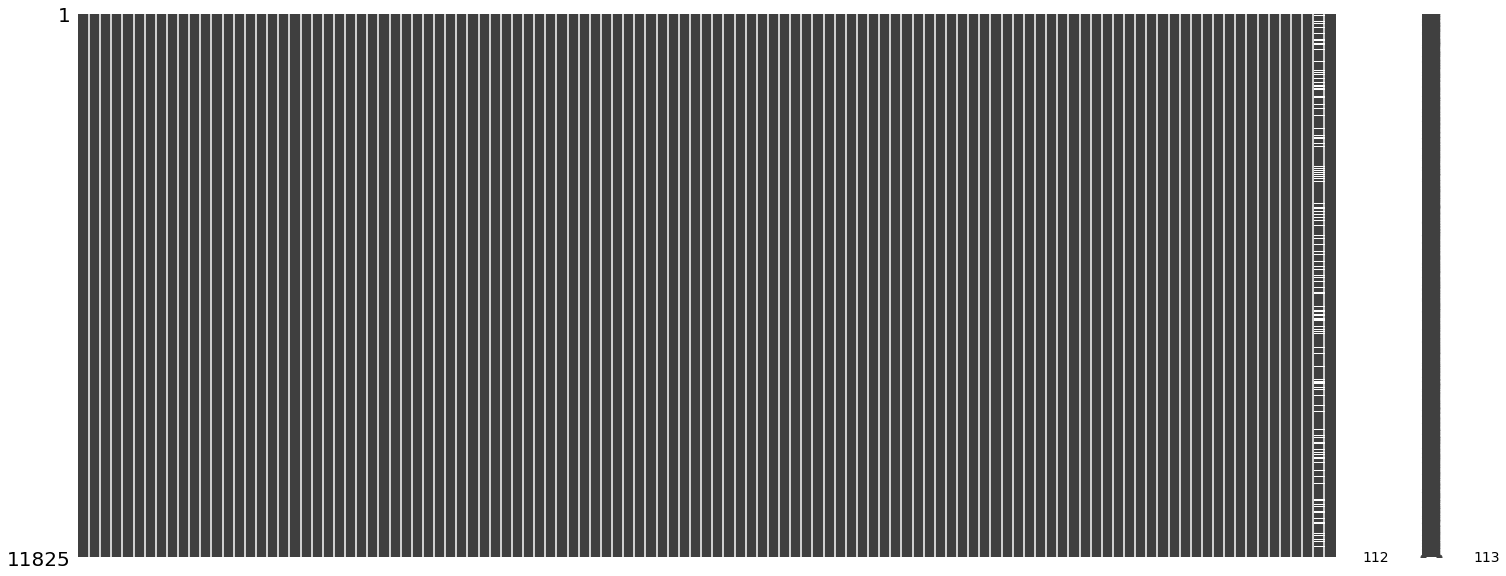

In [9]:
msgn.matrix(df);

Vamos a aplicar la instrucción del enunciado de la prueba para reducir los features del dataframe y a la vez separar las variables continuas de las discretas

In [10]:
df,categoricals,numerics=pp.create_suitable_dataframe(df)

['perobs', 'valores_perdidos']


In [11]:
df.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9383 entries, 0 to 11824
Data columns (total 78 columns):
recstat                        9383 non-null object
inout                          9383 non-null object
trhsloc                        9383 non-null object
typeofid                       9383 non-null object
explnstp                       9383 non-null object
othpers                        9383 non-null object
arstmade                       9383 non-null object
sumissue                       9383 non-null object
offunif                        9383 non-null object
officrid                       9383 non-null object
frisked                        9383 non-null object
searched                       9383 non-null object
contrabn                       9383 non-null object
pistol                         9383 non-null object
riflshot                       9383 non-null object
asltweap                       9383 non-null object
knifcuti                       9383 non-null object
othrweap

A continuación crearemos una funcion para poder graficar las variables de forma mas interpretable a simple vista e identificar sus comportamientos

Para ello separaremos en listas los tipos de variables

In [12]:
def graficar_variables(df: pd.DataFrame, var: str, type=1) -> None:
    """
    Grafica una variable categórica de un DataFrame.
    Aparecerá un Gráfico de barras cuando estemos frente a una variable binaria o categórica.
    Parameters
    ----------
    :param df: DataFrame
    :param var: Se debe ingresar la columna a graficar
    :return : None
    -------
    Se grafica la columna indicada.
    """
    assert type != 1 or type != 0 or type != 2

    if type == 0:
        sns.countplot(df[var])
    if type == 1:
        try:
            sns.distplot(df[var])
        except Exception:
            try:
                plt.hist(df[var])
            except:
                sns.countplot(df[var])
    else:
        try:
            sns.boxplot(data=df,y=var)
        except Exception:
            plt.hist(df[var])
    plt.title(var)
    plt.tight_layout()

In [13]:
object_data_type = pp.infer_datatype(df, 'object')
integer_data_type = pp.infer_datatype(df, 'int')
float_data_type = pp.infer_datatype(df, 'float')

numerics=list(integer_data_type) + list(float_data_type)

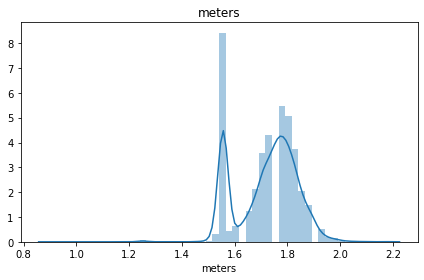

In [14]:
for i in numerics:
    graficar_variables(df,i,1)
    plt.show()

A continuación analizaremos el comportamiento de nuestro vector objetivo, el cual en este caso es 
'arstmade'

In [15]:
df['arstmade'].value_counts('%')

N    0.93712
Y    0.06288
Name: arstmade, dtype: float64

Analizamos cada variable para ver que contienen:

In [16]:
for columns in df.columns:
    print(columns)
    print(df[columns].value_counts())
    print('-------------------------- \n \n \n')



recstat
A    5677
1    3706
Name: recstat, dtype: int64
-------------------------- 
 
 

inout
O    7174
I    2209
Name: inout, dtype: int64
-------------------------- 
 
 

trhsloc
P    7027
H    1440
T     747
U     169
Name: trhsloc, dtype: int64
-------------------------- 
 
 

typeofid
P    5574
V    3522
R     158
O     129
Name: typeofid, dtype: int64
-------------------------- 
 
 

explnstp
Y    9372
N      11
Name: explnstp, dtype: int64
-------------------------- 
 
 

othpers
N    7726
Y    1657
Name: othpers, dtype: int64
-------------------------- 
 
 

arstmade
N    8793
Y     590
Name: arstmade, dtype: int64
-------------------------- 
 
 

sumissue
N    8701
Y     682
Name: sumissue, dtype: int64
-------------------------- 
 
 

offunif
Y    6729
N    2654
Name: offunif, dtype: int64
-------------------------- 
 
 

officrid
N    9251
Y     132
Name: officrid, dtype: int64
-------------------------- 
 
 

frisked
Y    5150
N    4233
Name: frisked, dtype: int64
--------

Name: valores_perdidos_porcentaje, dtype: int64
-------------------------- 
 
 

month
10    1029
11    1000
5      923
12     870
2      848
4      846
3      796
8      796
7      742
9      712
6      706
1      115
Name: month, dtype: int64
-------------------------- 
 
 

meters
1.767840    1283
1.554480    1215
1.798320    1190
1.737360    1011
1.828800     883
1.706880     844
1.557528     764
1.676400     496
1.859280     478
1.889760     344
1.645920     291
1.615440     154
1.920240     119
1.584960      98
1.524000      75
1.950720      50
1.981200      32
1.252728      11
2.011680      11
1.493520       7
2.042160       5
1.463040       4
2.072640       3
2.167128       3
1.249680       3
1.862328       3
0.914400       2
2.103120       2
0.975360       1
1.341120       1
Name: meters, dtype: int64
-------------------------- 
 
 

year
2010    4747
2009    4636
Name: year, dtype: int64
-------------------------- 
 
 



### Feature Engineering


Recodificaremos el vector de arrestos para tener un binario y así utilizarlo de manera mas comoda en el modelo

In [17]:
df['arstmade']=(df['arstmade'].str.contains('Y')).astype(int)

Podemos apreciar que el 6,2% de los casos terminan en arrestos.
Graficado se vería de la siguiente manera:

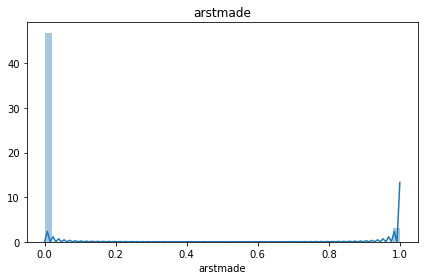

In [18]:
graficar_variables(df,'arstmade',1)
plt.show()

También se debe utilizar un nuevo atributo como vector objetivo que indique cuándo hubo violencia o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia. El detalle de los atributos que se consideran violentos se detalla a continuación: 

*'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other'*


In [19]:
df['hubo_violencia']=(df['pf_hands'].str.contains('Y') | df['pf_wall'].str.contains('Y') | df['pf_grnd'].str.contains('Y') | df['pf_drwep'].str.contains('Y') | df['pf_baton'].str.contains('Y') | df['pf_hcuff'].str.contains('Y') | df['pf_pepsp'].str.contains('Y') | df['pf_other'].str.contains('Y')).astype(int)

In [20]:
df['hubo_violencia']=np.where(df['hubo_violencia']==1,1,-1)
df['hubo_violencia'].value_counts('%')


-1    0.761697
 1    0.238303
Name: hubo_violencia, dtype: float64

Al recodificar el nuevo vector objetivo para saber si hubo arresto o no, podemos inferir que hubo violencia en el 26% de los casos

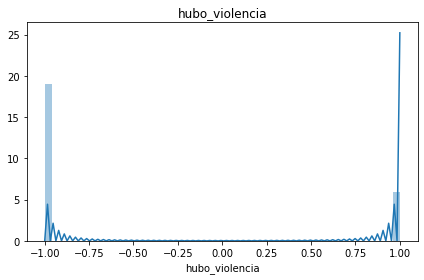

In [21]:
graficar_variables(df,'hubo_violencia',1)
plt.show()

In [22]:
# df a: entrenamiento

df_a['trhsloc'].value_counts()

P    4147
H    1027
T     433
      205
Name: trhsloc, dtype: int64

In [23]:
# df b: test

df_b['trhsloc'].value_counts()

P    4722
H     832
T     459
Name: trhsloc, dtype: int64

In [24]:
df = df[df.trhsloc != 'U']

Tenemos tres valores en trhsloc y algunos vienen indefinidos por lo que se van a eliminar. Se consideran data perdida los "U" para esta columna y que a nuestro criterio es relevante que se muestren sólo las clases válidas.

Las siguientes columnas las eliminaremos dado que viene sólo un dato y no son representativo:

In [25]:
del df['beat']

Se quita esta columna por que no se entiende ni encontramos el significado en los archivos ni en los value labels

In [26]:
del df['dettypcm']
del df['linecm']
del df['addrtyp']


Se quitan las columna dettypcm, linecm, addrtyp porque sólo tiene un tipo de valor lo cual no nos indica nada

In [27]:
del df['valores_perdidos_porcentaje']

Se remueve la columna valores_perdidos_porcentaje porque se utilizó solo para identificar porcentajes de datos etarios y ya cumplio su función

-------------------

La columan recstat es un indicador del registro lógico, en este caso A es activo y 1 es inactivo. 
No se eliminarán los 1 solo para poder tener más datos y se recodificara A='1', y 1='0.  
Además también se recodificará inout y aplicaremos get_dummies al resto de las variables


In [28]:
df['recstat']=np.where(df['recstat']=='A',1,0)

In [29]:
df['inout']=np.where(df['inout']=='I',1,0)

Guardamos los nombres del dataframe y aplicamos df_proba para los datos de pruebas para análisis de modelos

In [30]:
colnames=df.columns
df_proba = df[df.year == 2010]

In [31]:
df = pd.get_dummies(df, drop_first=True)

-------------------------------

### Modelación

**Modelos para el vector objetivo 1: Procedimiento con Arresto**


_ Modelo que sea capaz de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos dos métricas de desempeño.

Se separa la muestra para obtener el conjunto de entrenamiento y muestreo como indica la prueba

In [32]:
df['year'].unique()

array([2009, 2010], dtype=int64)

Separaremos en 2009 como conjunto entrenamiento y 2010 como conjunto de testeo

In [33]:
df_train = df[df.year == 2009]
df_test = df[df.year == 2010]

In [34]:
X_train= df_train.drop(columns = 'arstmade')
y_train = df_train['arstmade']
X_test=df_test.drop(columns = 'arstmade')
y_test=df_test['arstmade']


#### Modelo 1: GradientBoosting

In [35]:
modelo_gbc=GradientBoostingClassifier()
modelo_gbc.fit(X_train, y_train)
yhat_boost1 = modelo_gbc.predict(X_test)  

print(classification_report(y_test, yhat_boost1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.81      0.62      0.70       309

    accuracy                           0.97      4747
   macro avg       0.89      0.81      0.84      4747
weighted avg       0.96      0.97      0.96      4747



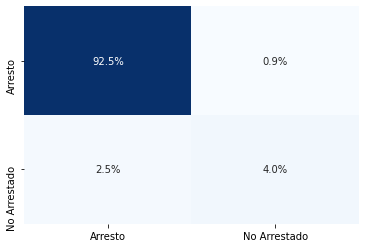

In [36]:
cnf = confusion_matrix(y_test, yhat_boost1)/len(y_test) 
target_label = ['Arresto', 'No Arrestado'] 
sns.heatmap(cnf, xticklabels=target_label, 
yticklabels=target_label, 
annot=True, fmt=".1%", 
cbar=False, cmap='Blues');

#### Modelo 2: AdaBoostClassifier

In [37]:
modelo_ab=AdaBoostClassifier()
modelo_ab.fit(X_train, y_train)
yhat_ada1 = modelo_ab.predict(X_test)  

print(classification_report(y_test, yhat_ada1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.79      0.62      0.69       309

    accuracy                           0.96      4747
   macro avg       0.88      0.80      0.84      4747
weighted avg       0.96      0.96      0.96      4747



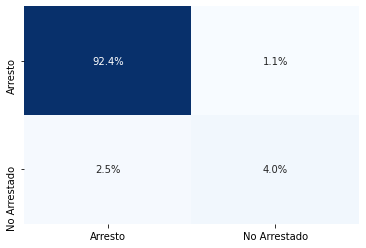

In [38]:
cnf = confusion_matrix(y_test, yhat_ada1)/len(y_test) 
target_label = ['Arresto', 'No Arrestado'] 
sns.heatmap(cnf, xticklabels=target_label, 
yticklabels=target_label, 
annot=True, fmt=".1%", 
cbar=False, cmap='Blues');

_ Refine los 30 atributos relevantes. Encuentre por lo menos 30 atributos que explique la importancia relativa y ordénelos por orden de importancia.

In [39]:
colnames=df.drop(columns = 'arstmade').columns
df_importance = pd.DataFrame({'atributo' : colnames, 'importance': modelo_ab.feature_importances_}).sort_values(by='importance', ascending=False)
df_importance = df_importance[:42]
df_importance

atributo  importance
3                meters        0.08
2                 month        0.06
110            sector_E        0.04
30           pf_hcuff_Y        0.04
18           contrabn_Y        0.04
64           sb_other_Y        0.02
29           pf_baton_Y        0.02
88          eyecolor_BL        0.02
107            sector_B        0.02
33              radio_Y        0.02
34            ac_rept_Y        0.02
35           ac_inves_Y        0.02
106  city_STATEN ISLAND        0.02
65            rf_furt_Y        0.02
40           cs_objcs_Y        0.02
111            sector_F        0.02
102       city_BROOKLYN        0.02
1                 inout        0.02
61           sb_hdobj_Y        0.02
60           ac_other_Y        0.02
46           cs_drgtr_Y        0.02
47           ac_evasv_Y        0.02
49           cs_furtv_Y        0.02
57            ac_time_Y        0.02
51           ac_cgdir_Y        0.02
67            offverb_Y        0.02
123            sector_U        0.02
13           sumissue_Y        0.02
116            sector_K        0.02
5        hubo_violencia        0.02
82          haircolr_GY        0.02
8            typeofid_P        0.02
9            typeofid_R        0.02
119            sector_P        0.02
12            othpers_Y        0.02
25            pf_wall_Y        0.02
53           cs_vcrim_Y        0.02
16            frisked_Y        0.02
22           knifcuti_Y        0.02
17           searched_Y        0.02
112            sector_G        0.02
23           othrweap_Y        0.02

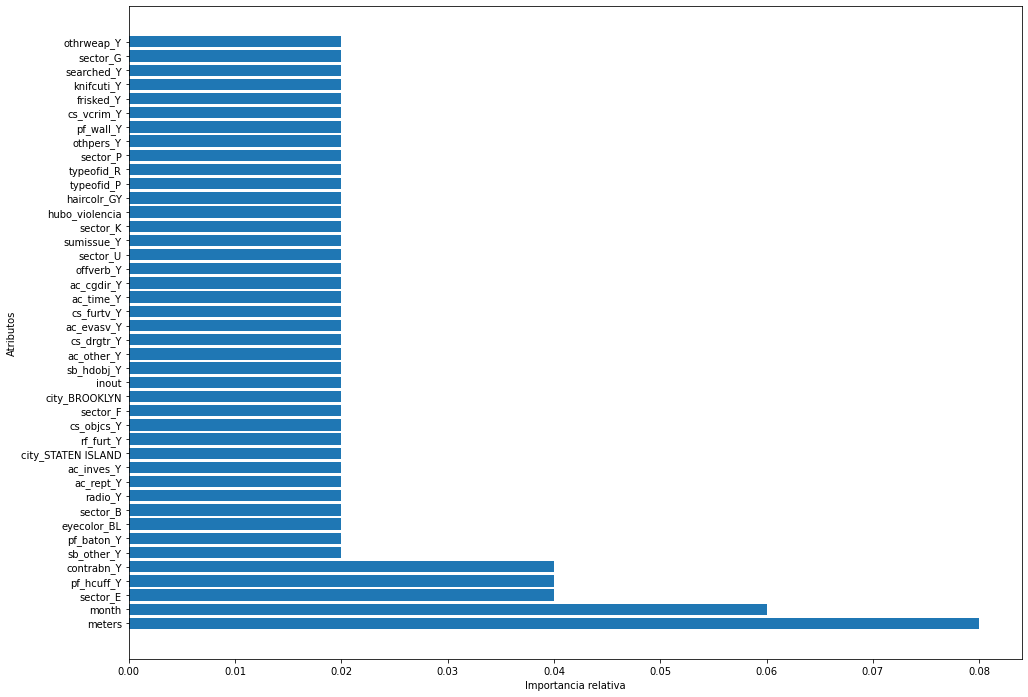

In [40]:
plt.figure(figsize=(16, 12))
plt.barh(range(42), df_importance['importance'])
plt.yticks(range(42), df_importance['atributo'])
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

_ Reporte la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza.

In [41]:
pr_arrest = modelo_ab.predict_proba(X_test)
pr_df = df_proba.loc[:,['city','race', 'sex','arstmade']]
pr_df

city race sex  arstmade
5812   MANHATTAN    W   M         0
5813       BRONX    B   M         0
5814   MANHATTAN    B   M         0
5815      QUEENS    Q   M         0
5816   MANHATTAN    Q   M         0
5817      QUEENS    P   F         0
5818   MANHATTAN    B   F         0
5820    BROOKLYN    B   M         0
5821       BRONX    B   M         0
5823      QUEENS    Z   M         1
5824      QUEENS    P   M         0
5825   STATEN IS    W   M         0
5827       BRONX    B   M         0
5831    BROOKLYN    B   M         0
5832    BROOKLYN    W   M         0
5833       BRONX    Z   Z         0
5837    BROOKLYN    B   M         0
5838    BROOKLYN    U   M         0
5840      QUEENS    B   M         0
5841    BROOKLYN    B   M         0
5842   MANHATTAN    B   M         0
5843      QUEENS    B   M         0
5847    BROOKLYN    Q   M         0
5848       BRONX    Q   M         0
5849    BROOKLYN    B   M         0
5851       BRONX    Q   M         0
5852    BROOKLYN    B   M         0
5855      QUEENS    B   M         0
5856    BROOKLYN    B   M         0
5857   MANHATTAN    Q   M         0
...          ...  ...  ..       ...
11787      BRONX    Q   M         0
11789  MANHATTAN    B   M         0
11790     QUEENS    B   M         0
11791   BROOKLYN    B   M         0
11792  MANHATTAN    Z   M         0
11794  MANHATTAN    W   M         0
11795   BROOKLYN    Q   M         0
11796  STATEN IS    B   M         0
11799  MANHATTAN    Q   M         0
11800   BROOKLYN    B   M         0
11801  MANHATTAN    B   M         0
11803     QUEENS    B   M         0
11804  MANHATTAN    B   M         0
11805   BROOKLYN    Q   M         0
11807  MANHATTAN    B   M         0
11808     QUEENS    B   M         0
11809  MANHATTAN    Q   M         0
11810     QUEENS    B   M         0
11811  MANHATTAN    Q   F         0
11812     QUEENS    Q   M         0
11814     QUEENS    Q   M         0
11815  MANHATTAN    B   M         0
11816  MANHATTAN    B   M         0
11817      BRONX    Z   Z         0
11818      BRONX    Q   M         0
11819     QUEENS    Q   F         0
11820   BROOKLYN    B   M         0
11821   BROOKLYN    Z   M         0
11823     QUEENS    Q   M         0
11824  MANHATTAN    B   M         0

[4747 rows x 4 columns]

Las probabilidades de que un individuo sea arretado se ven a continuación:

In [42]:
pr_df['pr_no_arrest'] = pr_arrest[:,0]
pr_df['pr_arrest'] = pr_arrest[:,1]

In [43]:
pr_df

city race sex  arstmade  pr_no_arrest  pr_arrest
5812   MANHATTAN    W   M         0      0.525205   0.474795
5813       BRONX    B   M         0      0.518378   0.481622
5814   MANHATTAN    B   M         0      0.520417   0.479583
5815      QUEENS    Q   M         0      0.523839   0.476161
5816   MANHATTAN    Q   M         0      0.512212   0.487788
5817      QUEENS    P   F         0      0.518779   0.481221
5818   MANHATTAN    B   F         0      0.693753   0.306247
5820    BROOKLYN    B   M         0      0.532356   0.467644
5821       BRONX    B   M         0      0.518141   0.481859
5823      QUEENS    Z   M         1      0.510773   0.489227
5824      QUEENS    P   M         0      0.522775   0.477225
5825   STATEN IS    W   M         0      0.519228   0.480772
5827       BRONX    B   M         0      0.534046   0.465954
5831    BROOKLYN    B   M         0      0.534006   0.465994
5832    BROOKLYN    W   M         0      0.515352   0.484648
5833       BRONX    Z   Z         0      0.506607   0.493393
5837    BROOKLYN    B   M         0      0.700031   0.299969
5838    BROOKLYN    U   M         0      0.535443   0.464557
5840      QUEENS    B   M         0      0.518993   0.481007
5841    BROOKLYN    B   M         0      0.524839   0.475161
5842   MANHATTAN    B   M         0      0.525044   0.474956
5843      QUEENS    B   M         0      0.538332   0.461668
5847    BROOKLYN    Q   M         0      0.539214   0.460786
5848       BRONX    Q   M         0      0.515413   0.484587
5849    BROOKLYN    B   M         0      0.519307   0.480693
5851       BRONX    Q   M         0      0.535190   0.464810
5852    BROOKLYN    B   M         0      0.513773   0.486227
5855      QUEENS    B   M         0      0.546966   0.453034
5856    BROOKLYN    B   M         0      0.520960   0.479040
5857   MANHATTAN    Q   M         0      0.529337   0.470663
...          ...  ...  ..       ...           ...        ...
11787      BRONX    Q   M         0      0.518513   0.481487
11789  MANHATTAN    B   M         0      0.518133   0.481867
11790     QUEENS    B   M         0      0.525601   0.474399
11791   BROOKLYN    B   M         0      0.534957   0.465043
11792  MANHATTAN    Z   M         0      0.528424   0.471576
11794  MANHATTAN    W   M         0      0.537992   0.462008
11795   BROOKLYN    Q   M         0      0.531317   0.468683
11796  STATEN IS    B   M         0      0.526098   0.473902
11799  MANHATTAN    Q   M         0      0.525616   0.474384
11800   BROOKLYN    B   M         0      0.526617   0.473383
11801  MANHATTAN    B   M         0      0.523270   0.476730
11803     QUEENS    B   M         0      0.696946   0.303054
11804  MANHATTAN    B   M         0      0.516576   0.483424
11805   BROOKLYN    Q   M         0      0.512574   0.487426
11807  MANHATTAN    B   M         0      0.512692   0.487308
11808     QUEENS    B   M         0      0.520826   0.479174
11809  MANHATTAN    Q   M         0      0.510835   0.489165
11810     QUEENS    B   M         0      0.535128   0.464872
11811  MANHATTAN    Q   F         0      0.536941   0.463059
11812     QUEENS    Q   M         0      0.511960   0.488040
11814     QUEENS    Q   M         0      0.536340   0.463660
11815  MANHATTAN    B   M         0      0.519096   0.480904
11816  MANHATTAN    B   M         0      0.516822   0.483178
11817      BRONX    Z   Z         0      0.521416   0.478584
11818      BRONX    Q   M         0      0.522537   0.477463
11819     QUEENS    Q   F         0      0.525891   0.474109
11820   BROOKLYN    B   M         0      0.523599   0.476401
11821   BROOKLYN    Z   M         0      0.691864   0.308136
11823     QUEENS    Q   M         0      0.511512   0.488488
11824  MANHATTAN    B   M         0      0.518745   0.481255

[4747 rows x 6 columns]

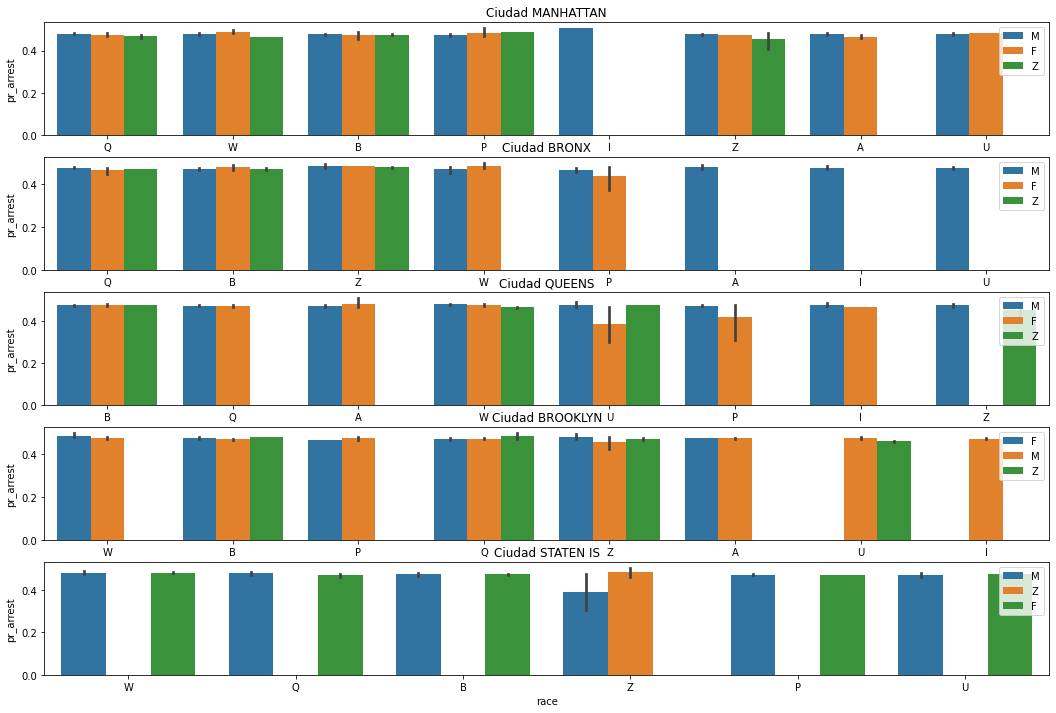

<Figure size 432x288 with 0 Axes>

In [44]:

city_list = list(pr_df['city'].unique())
plt.figure(figsize=(18,12))
plt.title('Probabilidad de Arrestos')
for i, city in enumerate(city_list):
    tmp_df = pr_df[pr_df['city']==city]
    #var = tmp_df['pr_arrest'].sort_values()
    plt.subplot(len(city_list),1, i+1)
    sns.barplot(data=tmp_df.sort_values(by='pr_arrest', ascending=False), x='race', y='pr_arrest', hue='sex')
    plt.legend(loc='upper right')
    plt.title('Ciudad '+city)


plt.show()
plt.tight_layout()

**Modelos para el vector objetivo 2: Predicción si habrá violencia en la detención**

In [45]:
df_train_rshp=df_train[df_importance['atributo'].values]
df_test_rshp=df_test[df_importance['atributo'].values]

In [46]:
df_train_rshp.shape

(4467, 42)

In [47]:
df_test_rshp.shape

(4747, 42)

In [48]:
X_train2=df_train_rshp.drop(columns = 'hubo_violencia')
y_train2 = df_train_rshp['hubo_violencia']
X_test2=df_test_rshp.drop(columns = 'hubo_violencia')
y_test2=df_test_rshp['hubo_violencia']


#### Modelo 1: Máquinas de Soporte Vectorial

In [49]:
modelo_svc=SVC(kernel='linear')
modelo_svc.fit(X_train2, y_train2)
yhat_svc = modelo_svc.predict(X_test2)  

print(classification_report(y_test2, yhat_svc))

              precision    recall  f1-score   support

          -1       0.82      1.00      0.90      3643
           1       1.00      0.28      0.43      1104

    accuracy                           0.83      4747
   macro avg       0.91      0.64      0.67      4747
weighted avg       0.86      0.83      0.79      4747



#### Modelo 2: AdaBoost

In [50]:
modelo_ab=AdaBoostClassifier()
modelo_ab.fit(X_train2, y_train2)
yhat_ada = modelo_ab.predict(X_test2)  

print(classification_report(y_test2, yhat_ada))

              precision    recall  f1-score   support

          -1       0.83      0.97      0.89      3643
           1       0.79      0.33      0.46      1104

    accuracy                           0.82      4747
   macro avg       0.81      0.65      0.68      4747
weighted avg       0.82      0.82      0.79      4747



#### Modelo 3: DecisionTree

In [51]:
modelo_dtc = DecisionTreeClassifier()
modelo_dtc_fit= modelo_dtc.fit(X_train2, y_train2) 
yhat_tree = modelo_dtc_fit.predict(X_test2) 

print(classification_report(y_test2, yhat_tree))

              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      3643
           1       0.47      0.51      0.49      1104

    accuracy                           0.75      4747
   macro avg       0.66      0.67      0.66      4747
weighted avg       0.76      0.75      0.76      4747



#### Modelo 4: GradientBoosting

In [52]:
modelo_gbc=GradientBoostingClassifier()
modelo_gbc_fit = modelo_gbc.fit(X_train2, y_train2)
yhat_boost = modelo_gbc_fit.predict(X_test2)  

print(classification_report(y_test2, yhat_boost))

              precision    recall  f1-score   support

          -1       0.82      0.99      0.90      3643
           1       0.92      0.29      0.44      1104

    accuracy                           0.83      4747
   macro avg       0.87      0.64      0.67      4747
weighted avg       0.84      0.83      0.79      4747



#### Modelo 5: RandomForest

In [53]:
modelo_rfc = RandomForestClassifier()
modelo_rfc.fit(X_train2, y_train2) 
yhat_random = modelo_rfc.predict(X_test2) 

print(classification_report(y_test2, yhat_random))

              precision    recall  f1-score   support

          -1       0.83      0.95      0.88      3643
           1       0.68      0.35      0.46      1104

    accuracy                           0.81      4747
   macro avg       0.75      0.65      0.67      4747
weighted avg       0.79      0.81      0.79      4747



**Elección del mejor modelo para determinar un arresto:**

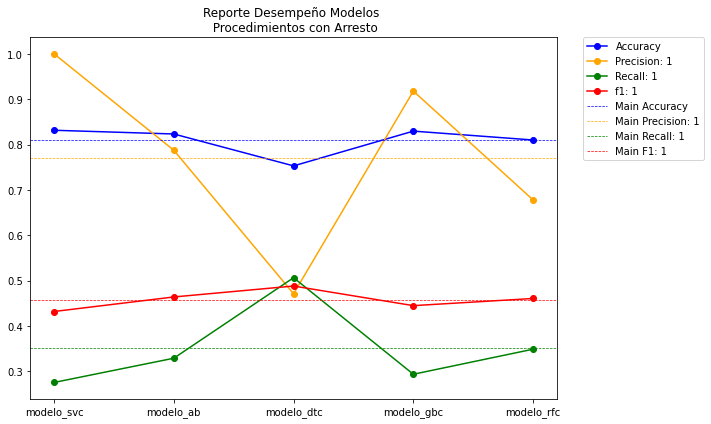

In [54]:
# hago una lista con los modelos
model_list = ['modelo_svc', 'modelo_ab', 'modelo_dtc', 'modelo_gbc', 'modelo_rfc']
# hago otra lista con los
yhat_list = [yhat_svc, yhat_ada, yhat_tree, yhat_boost, yhat_random]

pp.plot_final_report(model_list, yhat_list, y_test2)



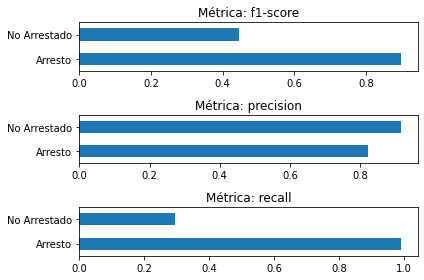

In [55]:
pp.plot_class_report(y_test2, yhat_boost, target_label)

### Pickling

Ahora generaremos una serialización de nuestro modelo depurado:

In [56]:
pickle.dump(modelo_gbc_fit, open('Prueba2_final_M1_PabloB_MelissaN.sav', 'wb'))

pickle.dump(modelo_dtc_fit, open('Prueba2_final_M2_PabloB_MelissaN.sav', 'wb'))

